In [1]:
# import package
import os
import pandas as pd

In [3]:
path_root = os.path.dirname(os.path.abspath('')) # get path root folder
path_dataset = os.path.join(path_root, 'dataset', 'dataset.xlsx')

In [4]:
def load_sensor_data(path):
    return pd.read_excel(path, skiprows = range(0, 2))

def drop_column(df):
    x = [0, 1, 2, 3, 4] #  0: Unnamed-0, Unnamed-1, Unnamed-2,  データＩＤ, Time
    df_droped = df.drop(df.columns[x], axis=1)
    return df_droped

### Cách tiếp cận 
    Theo mình thì có 2 hướng 
        - Time-series [2]
        - Regressor [1]
        
    ---------------------------
    [1] - Mình sẽ tiếp cận bài toán này bằng các Regressor trước 
        Công việc 
            - Loading Data from file excel
            - Change Column name [Unnamed-0, Unnamed-1, Unnamed-2, データＩＤ]
            - Remove feature not relate to training  
            - Create test set
            - Feature cleaning 


In [5]:
# Task 1: Loading data from file excel 
data = load_sensor_data(path=path_dataset)

In [7]:
# Task 2: change name column
data_copy = data.copy()
data_copy.rename(columns={'Unnamed: 0': 'datecheck-ID', 
                          'Unnamed: 1': 'shoes-ID',
                          'Unnamed: 2': 'balance-status',
                          'データＩＤ':'set-ID',
                         }, inplace = True)

In [8]:
# Task 3: removing feature which relate to train
data_copy = drop_column(df=data_copy)

In [9]:
data_copy.head()

,L-FX,L-FY,L-FZ,R-FX,R-FY,R-FZ,L-Fx1,L-Fy1,L-Fz1,L-Mx1,...,R-Fz3,R-Mx3,R-My3,R-Mz3,R-AccelX,R-AccelY,R-AccelZ,R-GyroX,R-GyroY,R-GyroZ
0,0.0,0.0,0.0,11.28,-53.86,575.76,5.568627,4.54902,2.823529,-0.235294,...,230.897959,-73.408163,18.795918,59.755102,0.02,0.07,0.97,0.91,-3.08,-3.29
1,0.0,0.0,0.0,6.73,-53.19,578.09,-4.431373,-1.45098,2.823529,-1.235294,...,215.897959,-69.408163,18.795918,57.755102,0.02,0.08,0.98,0.91,-3.01,-3.29
2,0.0,0.0,0.0,2.14,-51.21,583.97,3.568627,-3.45098,0.823529,-0.235294,...,203.897959,-71.408163,18.795918,56.755102,0.02,0.08,0.98,1.19,-3.08,-3.43
3,0.0,0.0,0.0,-5.64,-51.51,583.83,1.568627,0.54902,3.823529,1.764706,...,184.897959,-64.408163,18.795918,46.755102,0.02,0.08,0.98,1.75,-2.87,-3.36
4,0.0,0.0,0.0,-6.16,-51.57,585.65,-3.431373,-5.45098,2.823529,1.764706,...,167.897959,-61.408163,13.795918,40.755102,0.02,0.08,0.98,1.75,-2.59,-3.50


In [10]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236388 entries, 0 to 236387
Data columns (total 54 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   L-FX      236388 non-null  float64
 1   L-FY      236388 non-null  float64
 2   L-FZ      236388 non-null  float64
 3   R-FX      236388 non-null  float64
 4   R-FY      236388 non-null  float64
 5   R-FZ      236388 non-null  float64
 6   L-Fx1     236388 non-null  float64
 7   L-Fy1     236388 non-null  float64
 8   L-Fz1     236388 non-null  float64
 9   L-Mx1     236388 non-null  float64
 10  L-My1     236388 non-null  float64
 11  L-Mz1     236388 non-null  float64
 12  L-Fx2     236388 non-null  float64
 13  L-Fy2     236388 non-null  float64
 14  L-Fz2     236388 non-null  float64
 15  L-Mx2     236388 non-null  float64
 16  L-My2     236388 non-null  float64
 17  L-Mz2     236388 non-null  float64
 18  L-Fx3     236388 non-null  float64
 19  L-Fy3     236388 non-null  float64
 20  L-Fz

In [11]:
data_copy.describe()

,L-FX,L-FY,L-FZ,R-FX,R-FY,R-FZ,L-Fx1,L-Fy1,L-Fz1,L-Mx1,...,R-Fz3,R-Mx3,R-My3,R-Mz3,R-AccelX,R-AccelY,R-AccelZ,R-GyroX,R-GyroY,R-GyroZ
count,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,...,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000
mean,-1.418075,22.114680,298.793611,-1.300807,-22.114680,302.957281,62.012641,25.433141,138.041484,-50.307369,...,167.814836,-49.059797,4.437006,-0.411473,-0.011716,0.205985,1.023005,-5.576232,-3.760600,0.407934
std,30.683384,35.378709,282.987488,28.530326,35.378709,282.964398,108.512381,93.233803,224.987411,89.809899,...,246.634563,71.264729,37.332834,81.267939,0.296547,0.644761,0.530022,112.689013,46.868387,38.868049
min,-272.500000,-152.750000,-11.820000,-272.500000,-548.470000,-11.820000,-706.551020,-1369.960000,-623.895833,-1133.060000,...,-58.265306,-682.270833,-265.860000,-695.740000,-15.370000,-9.780000,-8.760000,-753.410000,-647.800000,-459.400000
25%,-4.910000,0.000000,0.000000,-4.820000,-38.650000,0.000000,0.080000,-4.020000,5.877551,-82.180000,...,-0.204082,-85.560000,-4.520833,-22.666667,-0.030000,0.050000,0.950000,-6.300000,-8.960000,-5.600000
50%,0.000000,6.430000,273.370000,0.000000,-6.430000,291.465000,18.660000,5.469388,47.642917,-14.591837,...,29.777755,-12.940000,0.081633,-0.940000,0.010000,0.070000,0.980000,0.700000,-0.910000,-0.100000
75%,3.340000,38.650000,550.910000,3.860000,0.000000,551.970000,91.940000,33.780000,178.489796,1.204082,...,278.944082,0.300000,6.653061,17.120000,0.060000,0.250000,1.030000,7.560000,6.400000,5.200000
max,430.640000,548.470000,1758.640000,430.640000,152.750000,1758.640000,2023.770833,1731.591837,2056.081633,569.612245,...,2036.541667,850.638298,860.520833,974.895833,7.730000,15.980000,15.410000,720.020000,790.700000,426.300000


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'L-FX'}>,
        <AxesSubplot:title={'center':'L-FY'}>,
        <AxesSubplot:title={'center':'L-FZ'}>,
        <AxesSubplot:title={'center':'R-FX'}>,
        <AxesSubplot:title={'center':'R-FY'}>,
        <AxesSubplot:title={'center':'R-FZ'}>,
        <AxesSubplot:title={'center':'L-Fx1'}>],
       [<AxesSubplot:title={'center':'L-Fy1'}>,
        <AxesSubplot:title={'center':'L-Fz1'}>,
        <AxesSubplot:title={'center':'L-Mx1'}>,
        <AxesSubplot:title={'center':'L-My1'}>,
        <AxesSubplot:title={'center':'L-Mz1'}>,
        <AxesSubplot:title={'center':'L-Fx2'}>,
        <AxesSubplot:title={'center':'L-Fy2'}>],
       [<AxesSubplot:title={'center':'L-Fz2'}>,
        <AxesSubplot:title={'center':'L-Mx2'}>,
        <AxesSubplot:title={'center':'L-My2'}>,
        <AxesSubplot:title={'center':'L-Mz2'}>,
        <AxesSubplot:title={'center':'L-Fx3'}>,
        <AxesSubplot:title={'center':'L-Fy3'}>,
        <AxesSubplot:title={'center':'L-Fz3'

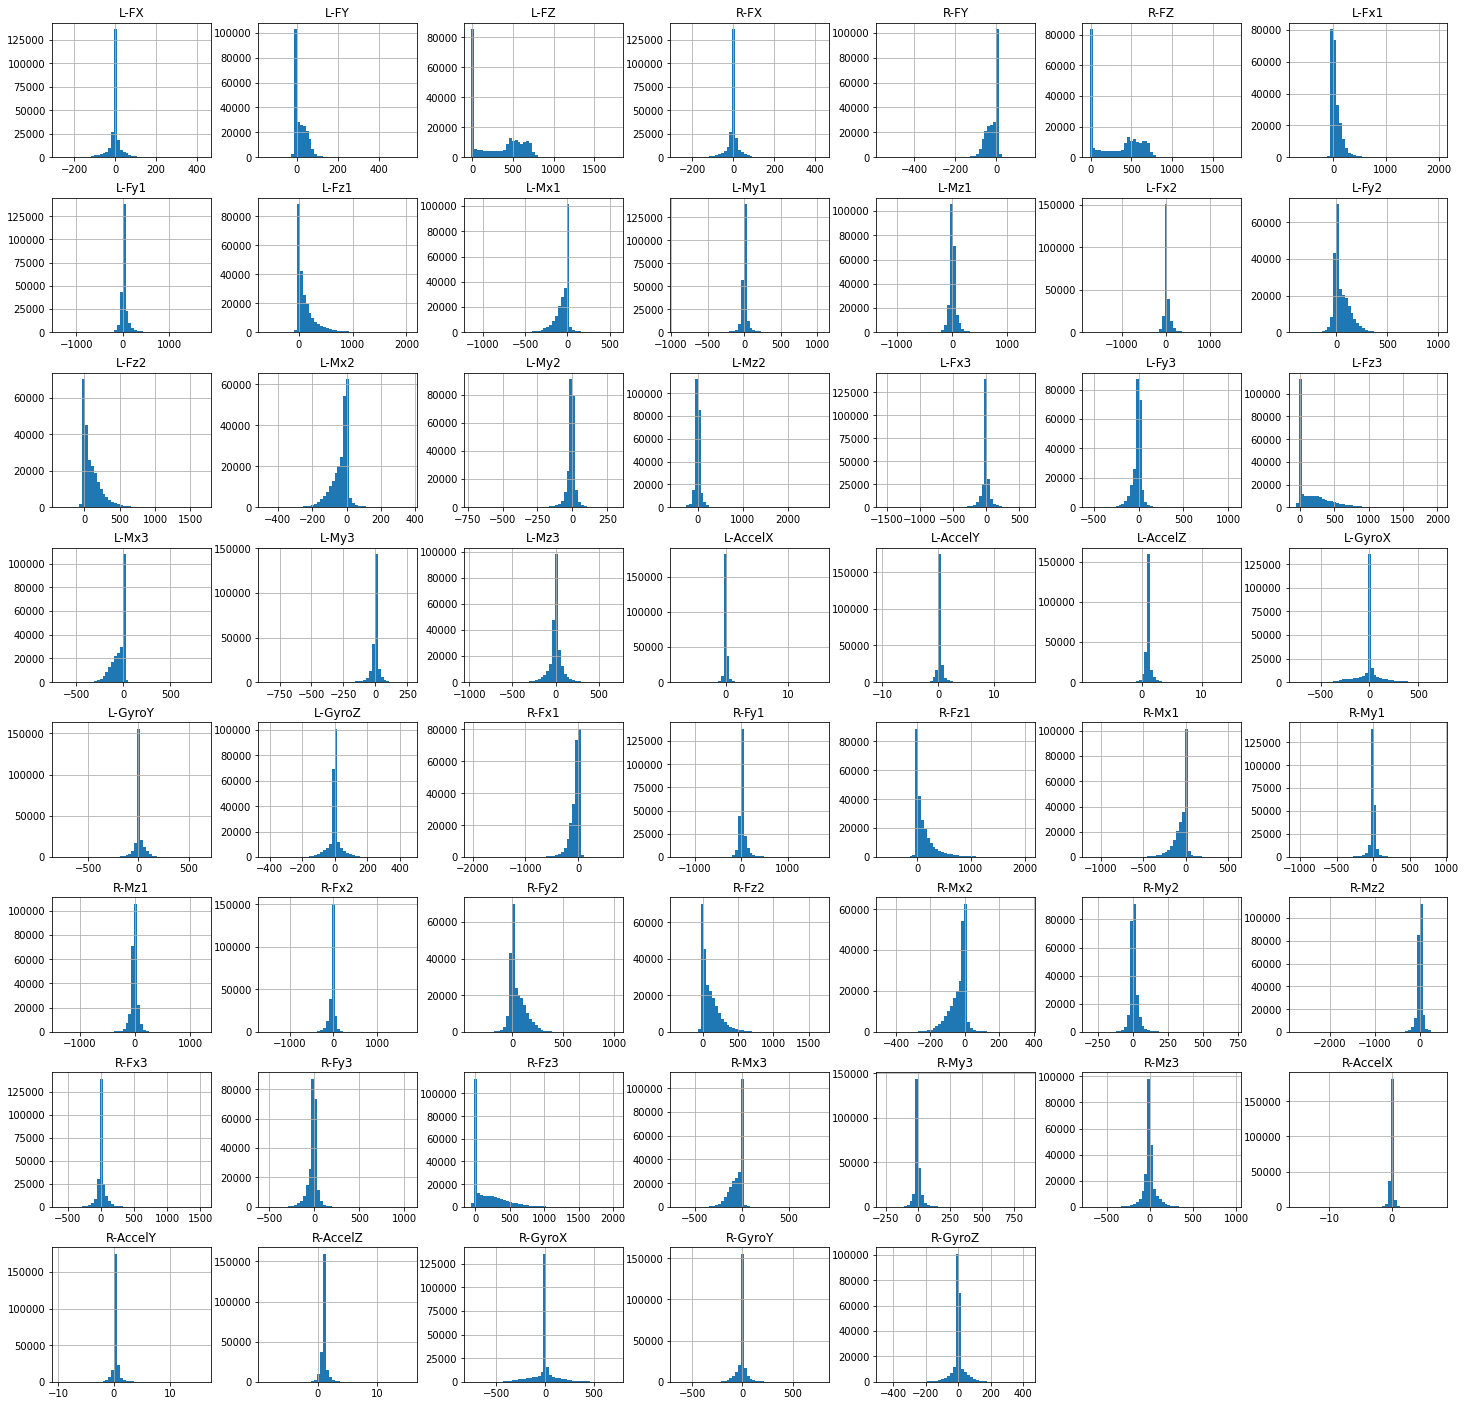

In [32]:
data_copy.hist(bins=50, figsize=(25,25))

In [33]:
# Looking for Correlations
corr_matrix = data_copy.corr()

In [35]:
corr_matrix["L-FX"].sort_values(ascending=False)

L-FX        1.000000
R-FX        0.197544
L-Mx1       0.105142
L-Fy2       0.098565
R-AccelX    0.080186
L-Mx2       0.072932
L-Fz3       0.069548
R-Fy1       0.059654
R-Fy2       0.039812
L-My3       0.037574
R-My2       0.035525
L-GyroY     0.028764
R-GyroX     0.028621
R-Fz2       0.027231
L-My1       0.024508
L-Mz3       0.022622
L-Fx3       0.022156
R-My1       0.022043
R-Mz1       0.018552
R-Fz1       0.018262
R-GyroY     0.015579
L-Fy1       0.013462
R-Mx3       0.013284
L-FY        0.010785
R-FZ        0.010037
L-AccelX    0.008993
R-My3       0.008185
L-GyroZ     0.005312
L-Mz2      -0.016599
L-My2      -0.017981
R-Mz2      -0.019366
R-Mx2      -0.022127
R-Fx2      -0.028815
R-Mx1      -0.031399
R-FY       -0.033507
L-Mz1      -0.034830
L-AccelY   -0.037337
R-AccelZ   -0.037597
R-Fz3      -0.041717
L-FZ       -0.046457
R-Mz3      -0.046987
R-Fx1      -0.047377
R-Fx3      -0.050220
R-Fy3      -0.062883
L-AccelZ   -0.069924
L-Fx1      -0.070875
L-Fz2      -0.075788
L-Fx2      -0

In [13]:
# Task 4: Creating Test-set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data_copy, test_size=0.2, random_state=42) # bị lệch dữ liệu giữa các class nếu dữ liệu quá nhỏ 

In [14]:
train_set.head()

,L-FX,L-FY,L-FZ,R-FX,R-FY,R-FZ,L-Fx1,L-Fy1,L-Fz1,L-Mx1,...,R-Fz3,R-Mx3,R-My3,R-Mz3,R-AccelX,R-AccelY,R-AccelZ,R-GyroX,R-GyroY,R-GyroZ
29918,0.0,0.00,0.0,75.10,-218.29,911.70,0.620000,9.080000,4.42000,7.040000,...,149.000000,-44.104167,22.312500,18.708333,-0.05,-0.03,1.22,4.41,-6.86,3.85
106268,0.0,0.00,0.0,14.89,-33.77,650.17,2.100000,-8.180000,-1.78000,1.420000,...,349.450980,65.509804,26.627451,139.568627,0.06,0.12,0.98,2.59,7.70,0.07
94787,6.3,75.43,478.8,0.00,0.00,0.00,235.510204,87.959184,220.22449,17.632653,...,-3.265306,-10.938776,1.857143,-41.897959,-0.24,0.61,0.83,39.27,1.12,0.14
112077,0.0,0.00,0.0,29.27,-36.54,482.95,0.080000,-2.980000,2.30000,-3.080000,...,127.607843,-14.196078,20.058824,61.647059,0.05,0.13,0.98,-1.05,9.66,-0.21
211956,0.0,0.00,0.0,-19.60,-18.56,644.55,-20.820000,38.360000,-18.64000,15.640000,...,329.660000,-90.180000,-26.300000,65.060000,0.01,0.06,0.97,0.20,-5.00,-2.80


In [46]:
data_training = train_set.drop(["L-FX", "L-FY", "L-FZ", "R-FX", "R-FY", "R-FZ"], axis=1)
data_labels = train_set[["L-FX", "L-FY", "L-FZ", "R-FX", "R-FY", "R-FZ"]].copy()

In [60]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor


data_training_process = StandardScaler().fit_transform(data_training)

In [ ]:
# setup Cross validation 
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores: \n", scores)
    print("Mean: \n", scores.mean())
    print("Standard deviation: \n", scores.std())

In [ ]:
# Linear Regression
clf = linear_model.LinearRegression()
clf.fit(data_training, data_labels)

In [47]:
# Checking RMSE 
data_predictions = clf.predict(data_training)
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
print("Liner rmse: ", lin_rmse)

# Cross validation     
scores = cross_val_score(clf, data_training, data_labels, scoring="neg_mean_squared_error", cv=10)
clf_rmse_scores = np.sqrt(-scores)
display_scores(scores=clf_rmse_scores)

# predict LinearRegression
some_Data = data_training.iloc[:5]
some_Labels = data_labels.iloc[:5]
# some_Data_prepared = StandardScaler().fit_transform(some_Data)
print("Predictions:\n", clf.predict(some_Data))
print("Labels: \n", some_Labels.to_numpy())

LinearRegression()

In [ ]:
### Decision Tree Regressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(data_training, data_labels)

In [51]:
# checking RMSE
data_predictions = tree_reg.predict(data_training)
tree_mse = mean_squared_error(data_labels, data_predictions)
tree_rmse = np.sqrt(tree_mse)
print("Liner rmse: ", tree_rmse)

# Cross validation     
scores = cross_val_score(tree_reg, data_training, data_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(scores=tree_rmse_scores)

# predict DecisionTreeRegressor
some_Data = data_training.iloc[:5]
some_Labels = data_labels.iloc[:5]
# some_Data_prepared = StandardScaler().fit_transform(some_Data)
print("Predictions:\n", tree_reg.predict(some_Data))
print("Labels: \n", some_Labels.to_numpy())

DecisionTreeRegressor()

In [63]:
### Random Forest Regressor 
forest_reg = RandomForestRegressor()
forest_reg.fit(data_training, data_labels)

RandomForestRegressor()

In [65]:
# checking RMSE
data_predicted = forest_reg.predict(data_training)
forest_mse = mean_squared_error(data_labels, data_predicted)
forest_rmse = np.sqrt(forest_mse)
print("Forest RMSE: ", forest_rmse)

# predict RandomForestRegressor
some_Data = data_training.iloc[:5]
some_Labels = data_labels.iloc[:5]
# some_Data_prepared = StandardScaler().fit_transform(some_Data)
print("Predictions:\n", forest_reg.predict(some_Data))
print("Labels: \n", some_Labels.to_numpy())

Forest RMSE:  14.242502239109733
Predictions:
 [[-1.866000e-01  1.489000e-01  7.154390e+01  3.765240e+01 -1.657985e+02
   8.379115e+02]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.323480e+01 -3.551720e+01
   6.481400e+02]
 [ 5.601600e+00  6.589020e+01  4.289459e+02 -4.810000e-02  7.240000e-02
   1.198600e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  2.617170e+01 -3.709850e+01
   4.816306e+02]
 [-2.126000e-01 -2.319000e-01  2.890800e+00 -1.617840e+01 -2.338250e+01
   6.471883e+02]]
Labels: 
 [[   0.      0.      0.     75.1  -218.29  911.7 ]
 [   0.      0.      0.     14.89  -33.77  650.17]
 [   6.3    75.43  478.8     0.      0.      0.  ]
 [   0.      0.      0.     29.27  -36.54  482.95]
 [   0.      0.      0.    -19.6   -18.56  644.55]]


In [66]:
# Cross validation     
scores = cross_val_score(forest_reg, data_training, data_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(scores=forest_rmse_scores)

KeyboardInterrupt: 

In [ ]:
# ---------------------------

In [51]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data= iris['data'], columns= iris['feature_names'] )

In [52]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit(df[['sepal length (cm)']],df[['petal length (cm)','petal width (cm)']])
clf.coef_

array([[1.85843298],
       [0.75291757]])

In [53]:
df[['petal length (cm)','petal width (cm)']]

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3
